Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [4]:
# imports
import requests
import pandas as pd
import os

#EBIKES DATAFRAME

In [5]:
url = "http://api.citybik.es/"
href = "/v2/networks/"
#network_id = 'velib'
response = requests.get(url + href)
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the JSON response into a Python dictionary
    data = response.json()
else:
    print("Request failed with status code:", response.status_code)
networks = data['networks']
city = 'Vancouver'
filtered_network = [network for network in networks if network['location']['city'] == city]
network_id = filtered_network[0]['href']
response1 = requests.get(url + network_id)
if response1.status_code == 200:
    # Parse the JSON response into a Python dictionary
    data1 = response1.json()
else:
    print("Request failed with status code:", response.status_code)
vancouver_network_stations = pd.json_normalize(data=data1, record_path=['network', 'stations'])
vancouver_network_stations = vancouver_network_stations[['free_bikes', 'id', 'longitude', 'latitude']]
vancouver_network_stations

,free_bikes,id,longitude,latitude
0,6,7a19c49f486d7c0c02b3685d7b240448,-123.114397,49.262487
1,10,32603a87cfca71d0f7dfa3513bad69d5,-123.121817,49.274566
2,9,6d42fa40360f9a6b2bf641c7b8bb2862,-123.110154,49.279764
3,1,66f873d641d448bd1572ab086665a458,-123.113504,49.260599
4,3,485d4d24c803cfde829ab89699fed833,-123.117772,49.264215
...,...,...,...,...
247,3,10acadd77bc21f26a7f09d8c74d4af2d,-123.114237,49.277773
248,11,58345bb719f4e570ed4edc9dfa6a68a2,-123.254307,49.263073
249,5,261efc67071963969b3f848c66454d97,-123.250902,49.259999
250,3,ee620d77724c8993b0d366e7ec655b64,-123.236210,49.254780


In [6]:
vancouver_network_stations = vancouver_network_stations.rename(columns={'id': 'station_id'})
vancouver_network_stations

,free_bikes,station_id,longitude,latitude
0,6,7a19c49f486d7c0c02b3685d7b240448,-123.114397,49.262487
1,10,32603a87cfca71d0f7dfa3513bad69d5,-123.121817,49.274566
2,9,6d42fa40360f9a6b2bf641c7b8bb2862,-123.110154,49.279764
3,1,66f873d641d448bd1572ab086665a458,-123.113504,49.260599
4,3,485d4d24c803cfde829ab89699fed833,-123.117772,49.264215
...,...,...,...,...
247,3,10acadd77bc21f26a7f09d8c74d4af2d,-123.114237,49.277773
248,11,58345bb719f4e570ed4edc9dfa6a68a2,-123.254307,49.263073
249,5,261efc67071963969b3f848c66454d97,-123.250902,49.259999
250,3,ee620d77724c8993b0d366e7ec655b64,-123.236210,49.254780


#FOURSQUARE DATAFRAME

In [7]:
radius_meters = 1000
four_square_api_key = os.environ['FOURSQUARE_API_KEY']
headers = {'Accept': 'application/json'}
headers['Authorization'] = four_square_api_key

#network_id = 'velib'
fsq_df = pd.DataFrame()
for index, row in vancouver_network_stations.iterrows():
    ll = str(row['latitude']) + ',' + str(row['longitude'])
    url = "https://api.foursquare.com/v3/places/search?ll=" + ll + "&radius=" + str(radius_meters)
    result = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
    if result.status_code == 200:
    # Parse the JSON response into a Python dictionary
        fsq_json = result.json()
        
        for fsq in fsq_json['results']:    
       
            fj = {
                'station_id': row['station_id'],
                'station_latitude': row['latitude'],
                'station_longitude': row['longitude'],
                'POI_name': fsq['name'],
                'POI_category': fsq['categories'][0]['name'],
                'POI_distance': fsq['distance'],

            }
            fj_df = pd.DataFrame(fj, index=[0])
            fsq_df = pd.concat([fsq_df, fj_df], ignore_index=True)
#else:
    print("Request failed with status code:", result.status_code)
fsq_df

Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
Request failed with status code: 200
R

,station_id,station_latitude,station_longitude,POI_name,POI_category,POI_distance
0,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,La Taqueria Pinche Taco Shop,Taco Restaurant,164
1,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,Whole Foods,Grocery Store,182
2,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,Hokkaido Ramen Santouka,Ramen Restaurant,186
3,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,Cactus Club Cafe Broadway + Ash,American Restaurant,232
4,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,Solly's Bagelry,Bakery,283
...,...,...,...,...,...,...
2509,e02dd224b0177c65418bcb3f72d2f77d,49.277510,-123.061429,Donald's Market,Grocery Store,501
2510,e02dd224b0177c65418bcb3f72d2f77d,49.277510,-123.061429,Tacofino Commissary,Mexican Restaurant,506
2511,e02dd224b0177c65418bcb3f72d2f77d,49.277510,-123.061429,Platform 7 Coffee,Café,507
2512,e02dd224b0177c65418bcb3f72d2f77d,49.277510,-123.061429,The Downlow Chicken Shack,Fried Chicken Joint,610


#YELP DATAFRAME

Given that a 403 error occured and I and the mentor was unable to solve the problem and I was unable to initiate get requests using python; I would need to individually get the responses on Yelp or through Postman using the longitude and latitude, which would take too much time to run all 250 Vancouver bike stations. I have exluded the Yelp dataframe from the join as from part II as it would result it too many null values as the amount of json files I retrieved is limited and it wouldn't provide meaninful data to the linear regression model

Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [8]:
join_df = pd.merge(fsq_df, vancouver_network_stations,on='station_id', how='left')
join_df = join_df.drop(columns=['longitude', 'latitude'])
join_df


,station_id,station_latitude,station_longitude,POI_name,POI_category,POI_distance,free_bikes
0,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,La Taqueria Pinche Taco Shop,Taco Restaurant,164,6
1,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,Whole Foods,Grocery Store,182,6
2,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,Hokkaido Ramen Santouka,Ramen Restaurant,186,6
3,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,Cactus Club Cafe Broadway + Ash,American Restaurant,232,6
4,7a19c49f486d7c0c02b3685d7b240448,49.262487,-123.114397,Solly's Bagelry,Bakery,283,6
...,...,...,...,...,...,...,...
2509,e02dd224b0177c65418bcb3f72d2f77d,49.277510,-123.061429,Donald's Market,Grocery Store,501,10
2510,e02dd224b0177c65418bcb3f72d2f77d,49.277510,-123.061429,Tacofino Commissary,Mexican Restaurant,506,10
2511,e02dd224b0177c65418bcb3f72d2f77d,49.277510,-123.061429,Platform 7 Coffee,Café,507,10
2512,e02dd224b0177c65418bcb3f72d2f77d,49.277510,-123.061429,The Downlow Chicken Shack,Fried Chicken Joint,610,10


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [9]:
#Determining the number of POI results per get request - Maximum 10 per station 1000 meter radius request
join_df.groupby('station_id').size()

station_id
00fa94ad698dc4a9e4d708d6fd32f294    10
012d3e06901cc222b1c2cf0a2ace3a29    10
029a505bd4422a1afd127987757f71a6    10
0438114d2e6b96118de69bc9775bb21e    10
0459b7e93703980b853cd65a9dc60596    10
                                    ..
fbb4c06b719596c21f91fd51ef6d4710    10
fe0c57d04d6e682d284d501446095fc9    10
fedff7a263c182df94bda7307059cc52    10
fef69fb400210d861107a61db954d037    10
fffd87607aaae16fbb1f71615cbe7d17    10
Length: 252, dtype: int64

In [10]:
#what is the average POI distance from the bike station and the number of free bikes available
join_df.groupby('station_id')[['free_bikes', 'POI_distance']].mean().sort_values(by='POI_distance')

,free_bikes,POI_distance
station_id,,
ee620d77724c8993b0d366e7ec655b64,3.0,80.7
1d7e73b3321ebb6713774d376247d9f9,4.0,124.0
e75e83499d3fa2e174dc2a8ffd238119,21.0,125.9
f5e8fa1fc4252bda2f93dd27ed2d603f,4.0,132.9
9ee3bc9e836768e3e04e4f3328dae03b,3.0,133.0
...,...,...
8d2d5bb3b9142f781f2a7f441e6bad7a,5.0,674.9
549f00f6039e8bb702a00dcca08a8ed0,3.0,686.2
899f59a9994302e8e1e4be01117ef707,21.0,696.8


In [11]:
import matplotlib.pyplot as plt

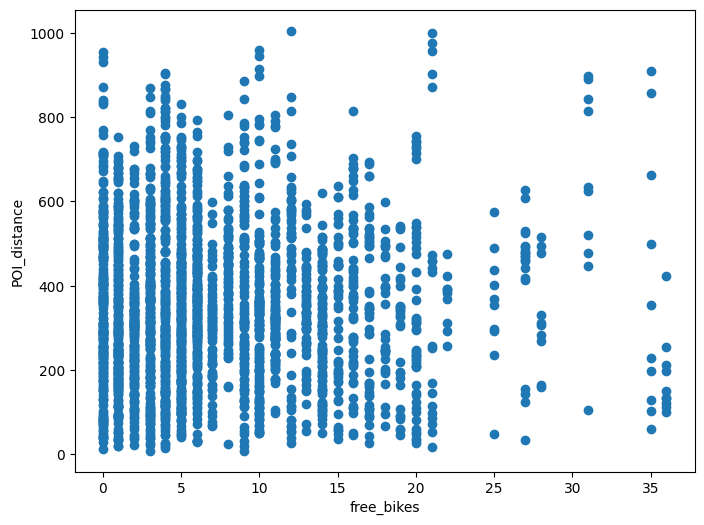

In [16]:
x= join_df['free_bikes']
y= join_df['POI_distance']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.xlabel('free_bikes')
plt.ylabel('POI_distance')
plt.show()


In [17]:
correlation = join_df['free_bikes'].corr(join_df['POI_distance'])
correlation

0.013077301726096491

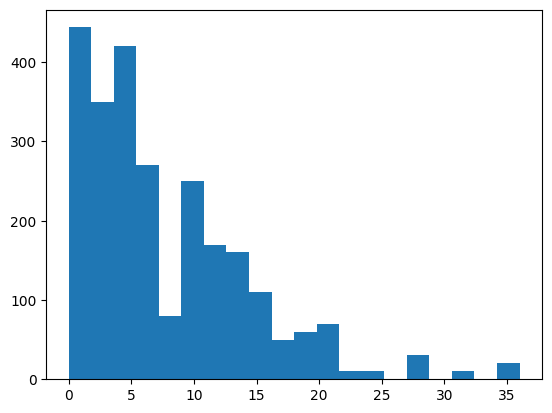

In [23]:
plt.hist(join_df['free_bikes'], bins=20)
plt.show()

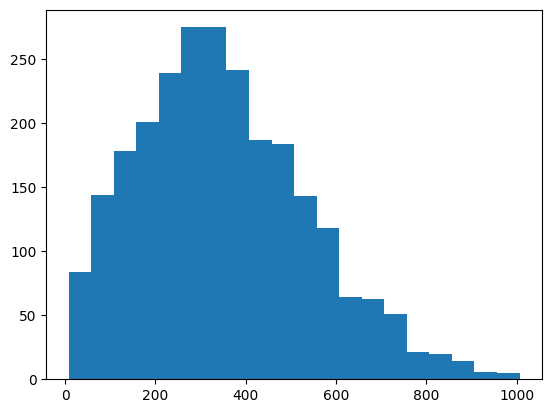

In [24]:
plt.hist(join_df['POI_distance'], bins=20)
plt.show()

In [18]:
join_df.groupby('POI_category')['station_id'].size()

POI_category
Alternative Medicine Clinic         8
American Restaurant                17
Amusement Park                      4
Aquarium                            3
Art Gallery                        16
                                   ..
Urban Park                          7
Vegan and Vegetarian Restaurant    24
Vietnamese Restaurant               8
Water Park                          1
Waterfront                          3
Name: station_id, Length: 147, dtype: int64

In [19]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         2514 non-null   object 
 1   station_latitude   2514 non-null   float64
 2   station_longitude  2514 non-null   float64
 3   POI_name           2514 non-null   object 
 4   POI_category       2514 non-null   object 
 5   POI_distance       2514 non-null   int64  
 6   free_bikes         2514 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 137.6+ KB


In [20]:
join_df.describe()

,station_latitude,station_longitude,POI_distance,free_bikes
count,2514.000000,2514.000000,2514.000000,2514.000000
mean,49.271670,-123.120434,351.200875,7.657120
std,0.011696,0.035335,187.995038,6.706585
min,49.238105,-123.254307,8.000000,0.000000
25%,49.263073,-123.138407,211.250000,3.000000
50%,49.271044,-123.118130,330.500000,6.000000
75%,49.280620,-123.099236,472.750000,11.000000
max,49.302577,-123.056909,1006.000000,36.000000


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [34]:
from sqlalchemy import create_engine
sqlite_db = 'sqlite:///../data/ebikes.db'

In [35]:
engine = create_engine(sqlite_db)
join_df.to_sql('ebikes_POI', con=engine, index=False)

2514

Look at the data before and after the join to validate your data.

In [21]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         2514 non-null   object 
 1   station_latitude   2514 non-null   float64
 2   station_longitude  2514 non-null   float64
 3   POI_name           2514 non-null   object 
 4   POI_category       2514 non-null   object 
 5   POI_distance       2514 non-null   int64  
 6   free_bikes         2514 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 137.6+ KB


In [22]:
join_df.describe()

,station_latitude,station_longitude,POI_distance,free_bikes
count,2514.000000,2514.000000,2514.000000,2514.000000
mean,49.271670,-123.120434,351.200875,7.657120
std,0.011696,0.035335,187.995038,6.706585
min,49.238105,-123.254307,8.000000,0.000000
25%,49.263073,-123.138407,211.250000,3.000000
50%,49.271044,-123.118130,330.500000,6.000000
75%,49.280620,-123.099236,472.750000,11.000000
max,49.302577,-123.056909,1006.000000,36.000000
